In [1]:
import pandas as pd
import numpy as np
import healpy as hp
import astropy.units as u
from astropy.coordinates import SkyCoord, CartesianRepresentation, Galactic,  cartesian_to_spherical
import matplotlib.pyplot as plt
from healpy import projview

import pyccl as ccl
from scipy import integrate
import pyccl as ccl
from scipy.optimize import curve_fit
from scipy.integrate import quad

In [ ]:
###################################################################################
##########                                                              ###########
##########  GERANDO GŔÁFICO MOLLWEIDE PARA VISUALIZAÇÃO DA PIXELIZAÇÃO  ###########
##########                                                              ###########
###################################################################################

In [2]:
# vamos definir os parâmetros de pixelização (nside=4 produz 192 calotas esféricas)

nside = 4
npix = hp.nside2npix(nside)

In [3]:
# Vamos obter as coordenadas dos centros dos pixels para nside=4

lon, lat = hp.pix2ang(nside, range(npix), lonlat=True)

galactic_coords = SkyCoord(l=lon, b=lat, frame='galactic', unit='deg')
equatorial_coords = galactic_coords.icrs #transform_to('icrs')

ra_pixel = equatorial_coords.ra.deg
dec_pixel = equatorial_coords.dec.deg

In [4]:
#VER PIXELS em coordenadas galácticas

coord_pixel = SkyCoord(ra=ra_pixel, dec=dec_pixel, frame='icrs', unit='deg')
coordenadas_pixel = coord_pixel.galactic

l_pixel = (coordenadas_pixel.l.deg)*np.pi/180
b_pixel = (coordenadas_pixel.b.deg)*np.pi/180

In [5]:
l_pixel[l_pixel > np.pi] = l_pixel[l_pixel > np.pi] - 2*np.pi
l_pixel[l_pixel < np.pi] = l_pixel[l_pixel < np.pi]*(-1)

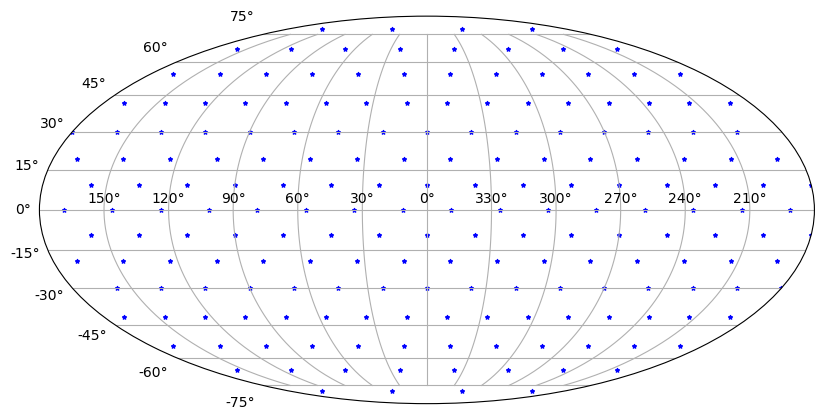

In [6]:
figure = plt.figure(figsize=(10.0, 8.0))
ax = figure.add_subplot(111, projection='mollweide')
# Para plotar todos os pixels:
plt.scatter(l_pixel, b_pixel, s=8, color='blue', marker='*')
#plt.scatter(l_pixel[20], b_pixel[20], s=8, color='blue', marker ='*')
plt.xticks(ticks=np.radians([-150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150]), labels=['150°', '120°', '90°', '60°', '30°', '0°', '330°', '300°', '270°', '240°', '210°'])
plt.grid()
plt.show()

In [ ]:
#############################################################################
############                                                  ###############
############  VISUALIANDO SUPERNOVAS VISTAS DO HEMISFÉRIO 36  ###############
############                                                  ###############
#############################################################################

In [8]:
#USANDO csv
data = pd.read_csv('/home/sofia/Documentos/Pantheon/Pantheon+SH0ES.csv', sep=' ')
data

,CID,IDSURVEY,zHD,zHDERR,zCMB,zCMBERR,zHEL,zHELERR,m_b_corr,m_b_corr_err_DIAG,...,PKMJDERR,NDOF,FITCHI2,FITPROB,m_b_corr_err_RAW,m_b_corr_err_VPEC,biasCor_m_b,biasCorErr_m_b,biasCor_m_b_COVSCALE,biasCor_m_b_COVADD
0,2011fe,51,0.00122,0.00084,0.00122,0.00002,0.00082,0.00002,9.74571,1.516210,...,0.1071,36,26.88590,0.864470,0.0991,1.4960,0.0381,0.005,1.000,0.003
1,2011fe,56,0.00122,0.00084,0.00122,0.00002,0.00082,0.00002,9.80286,1.517230,...,0.0579,101,88.30640,0.812220,0.0971,1.4960,-0.0252,0.003,1.000,0.004
2,2012cg,51,0.00256,0.00084,0.00256,0.00002,0.00144,0.00002,11.47030,0.781906,...,0.0278,165,233.50000,0.000358,0.0399,0.7134,0.0545,0.019,1.000,0.036
3,2012cg,56,0.00256,0.00084,0.00256,0.00002,0.00144,0.00002,11.49190,0.798612,...,0.0667,55,100.12200,0.000193,0.0931,0.7134,0.0622,0.028,1.000,0.040
4,1994DRichmond,50,0.00299,0.00084,0.00299,0.00004,0.00187,0.00004,11.52270,0.880798,...,0.0522,146,109.83900,0.988740,0.0567,0.6110,0.0650,0.009,1.000,0.006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,rutledge,106,1.61505,0.00545,1.61499,0.00500,1.61399,0.00500,25.90650,0.331927,...,1.7256,8,2.92493,0.938980,0.2230,0.0106,-0.0203,0.005,1.000,0.002
1697,geta,106,1.69706,0.04006,1.69702,0.04000,1.70000,0.04000,26.03330,0.379521,...,1.8973,12,9.15387,0.689730,0.3209,0.0748,0.2680,0.005,0.633,0.000
1698,stone,106,1.80119,0.02014,1.80111,0.02000,1.80000,0.02000,26.23350,0.280685,...,1.1631,11,11.69320,0.387140,0.2370,0.0358,-0.0968,0.004,0.641,0.000
1699,wilson,106,1.91165,0.00263,1.91160,0.00100,1.91401,0.00100,26.17030,0.357624,...,1.4902,9,5.54378,0.784570,0.3168,0.0044,-0.3835,0.013,0.604,0.000


In [9]:
Ind = []
for i in range(1701):
    Ind.append(i)

In [10]:
data['Indice'] = Ind

In [11]:
ra_data = data['RA']* np.pi / 180
dec_data = data['DEC']* np.pi / 180

In [12]:
# Raio do círculo em graus
raio = 90

n = 191
cont = 0

while cont <= n:
    
    # Coordenadas do centro do círculo/pixel em radianos
    ra_centro = ra_pixel[cont]* np.pi / 180
    dec_centro = dec_pixel[cont]* np.pi / 180
    
    # Usando a fórmula de Haversine
    delta_ra = ra_data - ra_centro
    delta_dec = dec_data - dec_centro
    
    a = np.sin(delta_dec / 2)**2 + np.cos(dec_centro) * np.cos(dec_data) * np.sin(delta_ra / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    
    distancia = np.degrees(c)
    objetos = data[distancia <= raio]
    
    local = f'/home/sofia/Documentos/Pantheon/Atividade 3/Hemisferios/{cont:03d}.csv'
    objetos.to_csv(local, index=False)
 
    cont += 1

In [13]:
#Vamos visualizar cada hemisfério

hemisphere = pd.read_csv('/home/sofia/Documentos/Pantheon/Atividade 3/Hemisferios/036.csv')

rao = hemisphere['RA']
deco = hemisphere['DEC']

coord = SkyCoord(ra=rao, dec=deco, frame='icrs', unit='deg')
coordenadas = coord.galactic

lv = (coordenadas.l.deg)*np.pi/180
bv = (coordenadas.b.deg)*np.pi/180

In [14]:
lv[lv > np.pi] = lv[lv > np.pi] - 2*np.pi
lv[lv < np.pi] = lv[lv < np.pi]*(-1)

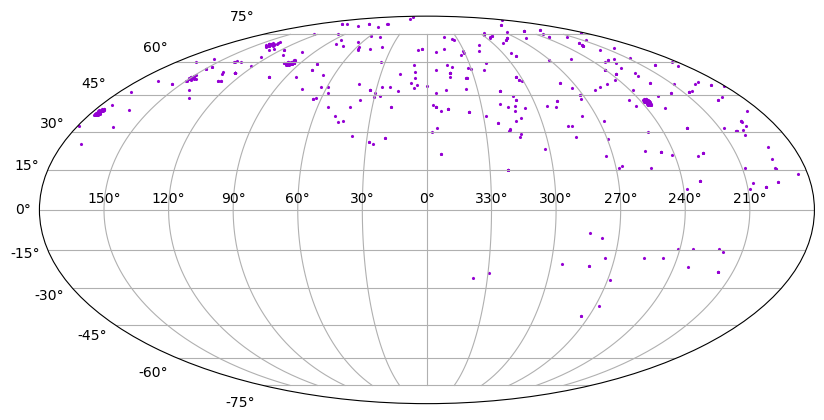

In [15]:
figure = plt.figure(figsize=(10.0, 8.0))
ax = figure.add_subplot(111, projection='mollweide')
plt.scatter(lv, bv, s=2, color='darkviolet', marker ='*')
plt.xticks(ticks=np.radians([-150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150]), labels=['150°', '120°', '90°', '60°', '30°', '0°', '330°', '300°', '270°', '240°', '210°'])
plt.grid()
plt.show()

In [ ]:
###################################################################################
##########                                                              ###########
##########    GERANDO O MAPA DE NÚMERO DE SUPERNOVAS POR HEMISFÉRIO     ###########
##########                                                              ###########
###################################################################################

In [16]:
# Criando mapa de número de supernovas:

n=191
cont=0

número = []
while cont <= n:
    local = f'/home/sofia/Documentos/Pantheon/Atividade 3/Hemisferios/{cont:03d}.csv'
    hemis = pd.read_csv(local)
    num = len(hemis)
      
    número.append(num)
    
    cont = cont + 1

In [17]:
valores_pix = número

nside = 4
npix = hp.nside2npix(nside) 

#criar um mapa vazio e atribuir os valores de números a cada pixel dele
hp_map = np.zeros(npix)
hp_map[:len(valores_pix)] = valores_pix

hp.write_map('/home/sofia/Documentos/Pantheon/Atividade 3/Hemisferios/number_map.fits', hp_map, overwrite=True)

setting the output map dtype to [dtype('float64')]


In [18]:
mapa_num = hp.read_map('/home/sofia/Documentos/Pantheon/Atividade 3/Hemisferios/number_map.fits')

In [19]:
fontsize = {
"xlabel": 15,           # Tamanho da fonte do rótulo do eixo x
"ylabel": 15,           # Tamanho da fonte do rótulo do eixo y
"title": 20,            # Tamanho da fonte do título
"xtick_label": 15,      # Tamanho da fonte dos rótulos do eixo x
"ytick_label": 15,      # Tamanho da fonte dos rótulos do eixo y
"cbar_label": 15,       # Tamanho da fonte da legenda da barra de cores
"cbar_tick_label": 15   # Tamanho da fonte dos rótulos da barra de cores
}

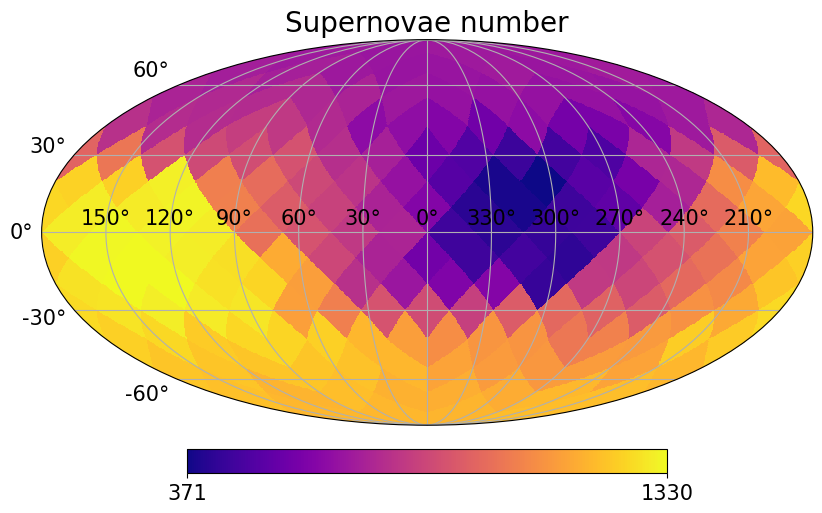

In [20]:
projview(hp_map,
coord=["G"],
norm="hist",
cmap='plasma',
title='Supernovae number',
graticule=True,
graticule_labels=True,
longitude_grid_spacing=30,
projection_type="mollweide",
fontsize=fontsize)
plt.show()